# BVMT Data Exploration & Top Liquid Stocks
## IHEC CODELAB 2.0 - Forecasting Module

**Goal**: Identify the top 10 most liquid stocks for our forecasting model

In [5]:
import sys
sys.path.insert(0, r"C:\Users\rania\Downloads\ihec\projet")

In [6]:
import sys
sys.path.append('../modules')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modules.shared.data_loader import load_raw_data, get_stock_data, get_most_liquid_stocks, get_stock_name

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 1. Load and Explore Dataset

In [11]:
# Load data
from modules.shared.data_loader import load_raw_data

loader = load_raw_data(verbose=True)
print(loader.head())
print("Rows:", len(loader))
print("Stocks:", loader["code"].nunique())
print("Date range:", loader["date"].min(), "->", loader["date"].max())


📂 Chargement depuis : C:/Users/rania/Downloads/ihec/projet/histo_cotation_combined_2022_2025.csv
✅ Colonnes nettoyées : ['SEANCE', 'GROUPE', 'CODE', 'VALEUR', 'OUVERTURE', 'CLOTURE', 'PLUS_BAS', 'PLUS_HAUT', 'QUANTITE_NEGOCIEE', 'NB_TRANSACTION', 'CAPITAUX']
📅 Colonne date identifiée : 'SEANCE'
⚠️ Dates invalides: 0 / 519,382
📊 Données prêtes : 519,382 lignes | 745 actions
        date          code      name  open  close  high   low  volume  \
0 2022-01-03  TN0001000108  MONOPRIX  4.65   4.65  4.65  4.65     744   
1 2022-01-04  TN0001000108  MONOPRIX  4.65   4.64  4.64  4.56     645   
2 2022-01-05  TN0001000108  MONOPRIX  4.64   4.64  4.64  4.63    3810   
3 2022-01-06  TN0001000108  MONOPRIX  4.64   4.64  0.00  0.00       0   
4 2022-01-07  TN0001000108  MONOPRIX  4.64   4.64  0.00  0.00       0   

   num_transactions   capital  
0                 3   3459.60  
1                 6   2961.90  
2                 4  17640.33  
3                 0      0.00  
4                 0      

## 2. Identify Top 10 Most Liquid Stocks

In [13]:
from modules.shared.data_loader import load_raw_data, get_most_liquid_stocks

df = load_raw_data(verbose=False)
top_10 = get_most_liquid_stocks(10)

print("Top 10 liquid:")
display(top_10)

Top 10 liquid:


,code,name,trading_days,total_volume,total_capital,total_transactions,avg_transactions,liq_score
286,TN0007400013,CARTHAGE CEMENT,1005,129359619,2.460878e+08,86333,85.903483,39.704685
5,TN0001100254,SFBT,1008,38804280,5.179259e+08,63283,62.780754,38.562100
306,TN0007610017,SAH,1008,37073183,3.578846e+08,78751,78.125992,38.550324
294,TN0007530017,ONE TECH HOLDING,999,48592895,4.532270e+08,48473,48.521522,38.453723
186,TN0006560015,SOTUVER,1004,27627026,3.202362e+08,49495,49.297809,37.736237
320,TN0007630015,SOTIPAPIER,985,35403498,2.375676e+08,31903,32.388832,37.395789
260,TN0007270010,TPR,991,28024753,2.164156e+08,34602,34.916246,37.196650
80,TN0002200053,BT,1004,30658993,1.639676e+08,35276,35.135458,37.167013
126,TN0003400058,AMEN BANK,962,11889408,4.280360e+08,50752,52.756757,37.063243
174,TN0005700018,POULINA GP HOLDING,960,18940976,2.459009e+08,35353,36.826042,36.890225


## 3. Visualize Price History for Top 3 Stocks

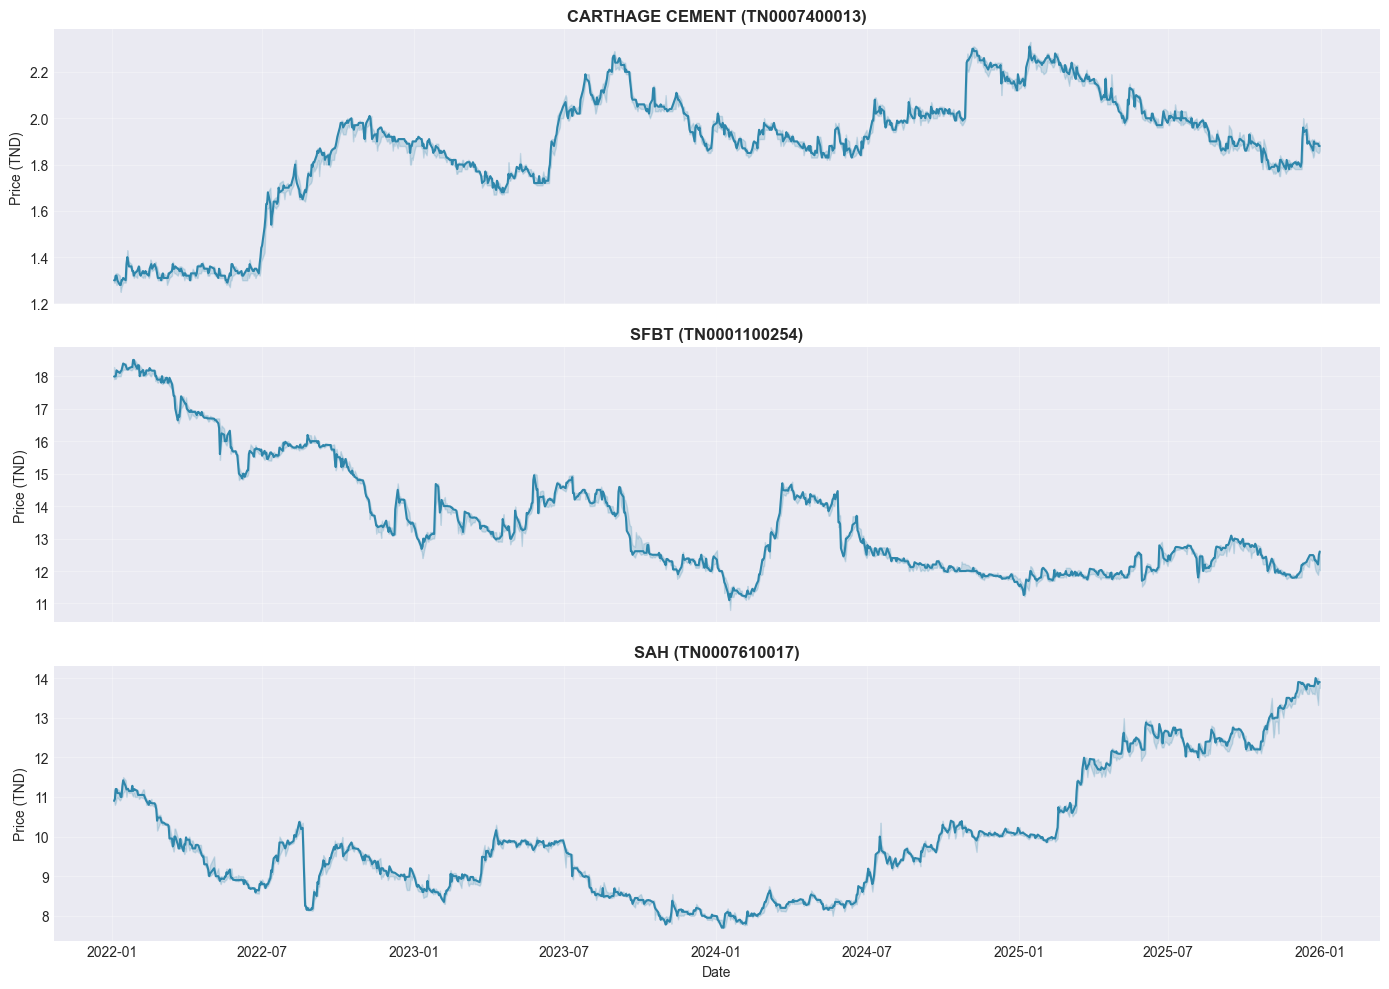

✅ Saved plot: outputs/top_3_stocks_overview.png


In [16]:
import matplotlib.pyplot as plt
from modules.shared.data_loader import get_stock_data

# top_10 doit être un DataFrame avec colonnes: code, name
# Exemple: top_10 = get_most_liquid_stocks(10)

fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

top3 = top_10.head(3).reset_index(drop=True)

for i, row in top3.iterrows():
    stock_code = row["code"]
    stock_name = row["name"]

    # Get data (filtrer volume=0)
    df = get_stock_data(stock_code, min_volume=1).sort_values("date")

    axes[i].plot(df["date"], df["close"], linewidth=1.5, color="#2E86AB", label="Close")

    # Vérifier low/high existent
    if "low" in df.columns and "high" in df.columns:
        axes[i].fill_between(df["date"], df["low"], df["high"], alpha=0.2, color="#2E86AB", label="Low-High")

    axes[i].set_title(f"{stock_name} ({stock_code})", fontsize=12, fontweight="bold")
    axes[i].set_ylabel("Price (TND)", fontsize=10)
    axes[i].grid(True, alpha=0.3)

axes[-1].set_xlabel("Date", fontsize=10)
plt.tight_layout()

# Sauvegarde (chemin simple)
plt.savefig("outputs/top_3_stocks_overview.png", dpi=150, bbox_inches="tight")
plt.show()

print("✅ Saved plot: outputs/top_3_stocks_overview.png")

## 4. Data Quality Check

In [19]:
from modules.shared.data_loader import get_stock_data

print("\n📊 DATA QUALITY ANALYSIS:")
print("="*80)

top5 = top_10.head(5).reset_index(drop=True)

for _, row in top5.iterrows():
    stock_code = row["code"]
    stock_name = row["name"]

    df = get_stock_data(stock_code, min_volume=0).sort_values("date")  # garde volume=0

    zero_volume_days = int((df["volume"] == 0).sum()) if "volume" in df.columns else 0
    missing_prices = int(df["close"].isna().sum())

    print(f"{stock_name[:30]:30s} | Days: {len(df):4d} | Zero Vol: {zero_volume_days:4d} | Missing: {missing_prices:4d}")

print("="*80)


📊 DATA QUALITY ANALYSIS:
CARTHAGE CEMENT                | Days: 1009 | Zero Vol:    4 | Missing:    0
SFBT                           | Days: 1009 | Zero Vol:    1 | Missing:    0
SAH                            | Days: 1009 | Zero Vol:    1 | Missing:    0
ONE TECH HOLDING               | Days: 1009 | Zero Vol:   10 | Missing:    0
SOTUVER                        | Days: 1009 | Zero Vol:    5 | Missing:    0


## 5. Save Stock Codes for Team

Export the top liquid stocks to JSON for other team members

In [21]:
import json
from pathlib import Path

# top_10 est un DataFrame (ex: get_most_liquid_stocks(10))
# On construit un mapping code -> infos
stock_mapping = {}

for _, row in top_10.iterrows():
    code = str(row.get("code", "")).strip()
    name = str(row.get("name", "UNKNOWN")).strip()

    if not code:
        continue

    stock_mapping[code] = {
        "name": name,
        "avg_daily_volume": float(row["avg_daily_volume"]) if "avg_daily_volume" in top_10.columns and pd.notna(row["avg_daily_volume"]) else None,
        "trading_days": int(row["trading_days"]) if "trading_days" in top_10.columns and pd.notna(row["trading_days"]) else None,
        "total_volume": float(row["total_volume"]) if "total_volume" in top_10.columns and pd.notna(row["total_volume"]) else None,
        "total_capital": float(row["total_capital"]) if "total_capital" in top_10.columns and pd.notna(row["total_capital"]) else None,
    }

# Sauvegarde JSON (chemin propre)
out_path = Path("modules/forecasting/stock_codes.json")
out_path.parent.mkdir(parents=True, exist_ok=True)

with open(out_path, "w", encoding="utf-8") as f:
    json.dump(stock_mapping, f, indent=2, ensure_ascii=False)

print(f"✅ Saved stock codes mapping to: {out_path}")
print("\n📋 Top Stock Codes for Team:")
for code, info in list(stock_mapping.items())[:10]:
    print(f"  - {code}: {info['name']}")

✅ Saved stock codes mapping to: modules\forecasting\stock_codes.json

📋 Top Stock Codes for Team:
  - TN0007400013: CARTHAGE CEMENT
  - TN0001100254: SFBT
  - TN0007610017: SAH
  - TN0007530017: ONE TECH HOLDING
  - TN0006560015: SOTUVER
  - TN0007630015: SOTIPAPIER
  - TN0007270010: TPR
  - TN0002200053: BT
  - TN0003400058: AMEN BANK
  - TN0005700018: POULINA GP HOLDING


## 6. Sample Data Export

Export sample data for top 3 stocks (for testing other modules)

In [10]:
# Export sample data
for i, stock in enumerate(top_10[:3]):
    stock_code = stock['stock_code']
    stock_name = stock['stock_name']
    
    df = loader.get_stock_data(stock_code, remove_zero_volume=True)
    
    # Save last 30 days
    df_sample = df.tail(30)
    output_file = f"../data/sample_{stock_code}.csv"
    df_sample.to_csv(output_file, index=False)
    
    print(f"✅ Exported {stock_name} sample: {output_file}")

✅ Exported MNP DS 7/26 040523 sample: ../data/sample_TN8GHX6XE469.csv
✅ Exported CARTHAGE CEMENT    sample: ../data/sample_TN0007400013.csv
✅ Exported ADWYA              sample: ../data/sample_TN0007250012.csv


---
## Next Steps:

1. ✅ Identified top 10 liquid stocks
2. ✅ Verified data quality
3. ✅ Exported stock codes for team
4. 🔄 Run `forecasting_backtest.ipynb` to train models and generate predictions
